In [2]:
import pandas as pd
file_path = r"C:\Users\ARSH\OneDrive\Desktop\edu stuffs\cleaned_data.csv"
df = pd.read_csv(file_path)
df.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,jammu and kashmir,reasi,moong(green gram),2015,kharif,13.0,9.0,0.70
1,uttar pradesh,jalaun,sannhamp,2010,kharif,9.0,3.0,0.33
2,uttar pradesh,ballia,bajra,1997,kharif,1717.0,1756.0,1.02
3,tripura,north tripura,cotton(lint),2010,kharif,299.0,439.0,1.47
4,andhra pradesh,east godavari,dry chillies,2009,rabi,290.0,1141.0,3.93


In [6]:
df[['State', 'District', 'Crop']].head()

,State,District,Crop
0,jammu and kashmir,reasi,moong(green gram)
1,uttar pradesh,jalaun,sannhamp
2,uttar pradesh,ballia,bajra
3,tripura,north tripura,cotton(lint)
4,andhra pradesh,east godavari,dry chillies


In [18]:
# Count how many times each crop appears in each district and state
crop_counts = df.groupby(['State', 'District', 'Crop']).size().reset_index(name='count')

# Calculate the total crops per district (to get ratio)
district_totals = crop_counts.groupby(['State', 'District'])['count'].sum().reset_index(name='total')

# Merge to calculate ratio
merged = pd.merge(crop_counts, district_totals, on=['State', 'District'])
merged['crop_ratio'] = merged['count'] / merged['total']


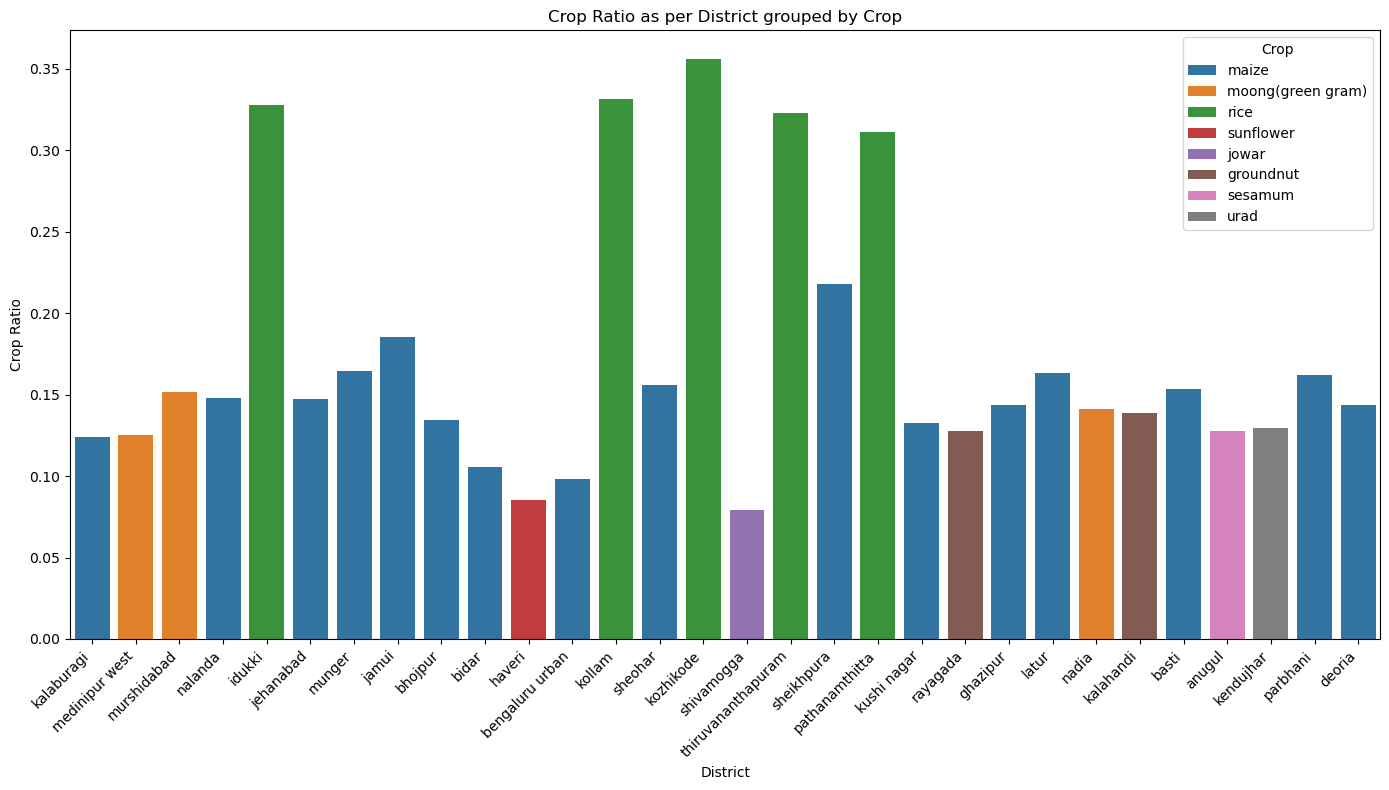

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Plot top 10 for simplicity, or use full dataset if desired
top_districts = merged.sort_values('count', ascending=False).head(30)

sns.barplot(
    data=top_districts,
    x='District',
    y='crop_ratio',
    hue='Crop'
)

plt.xticks(rotation=45, ha='right')
plt.title('Crop Ratio as per District grouped by Crop')
plt.xlabel('District')
plt.ylabel('Crop Ratio')
plt.legend(title='Crop')
plt.tight_layout()
plt.show()


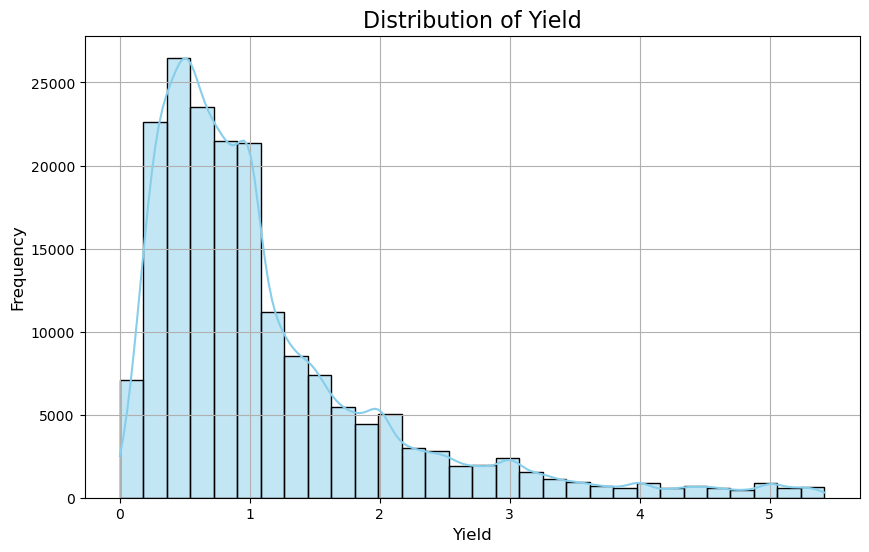

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Yield'], kde=True, color='skyblue', bins=30)

plt.title('Distribution of Yield', fontsize=16)
plt.xlabel('Yield', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


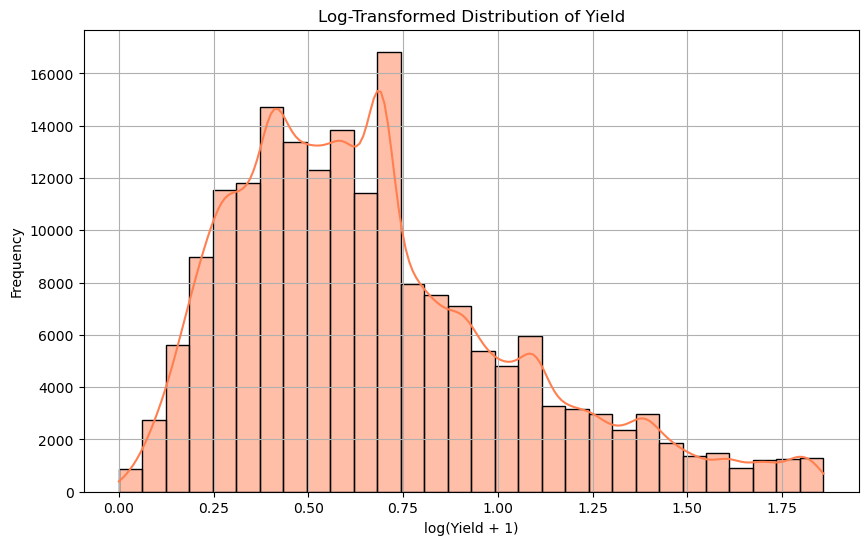

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_check = df.copy()

df_check['log_yield'] = np.log1p(df_check['Yield'])  


plt.figure(figsize=(10, 6))
sns.histplot(df_check['log_yield'], kde=True, color='coral', bins=30)

plt.title('Log-Transformed Distribution of Yield')
plt.xlabel('log(Yield + 1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


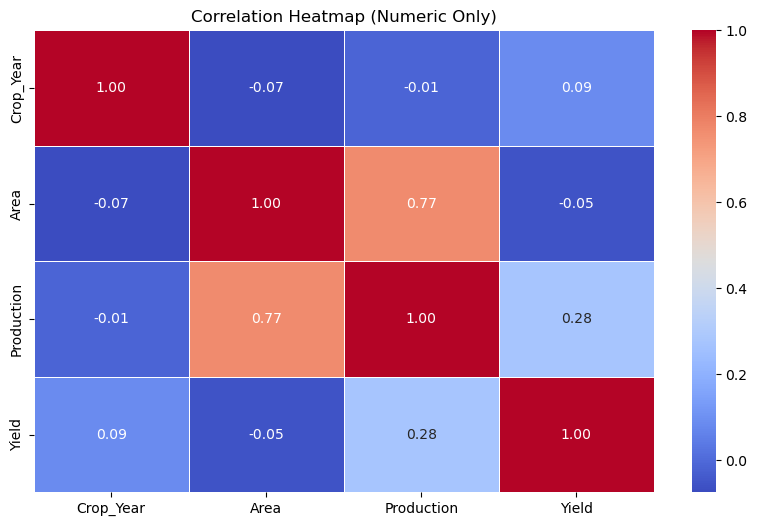

In [40]:
df_numeric = df_check.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap (Numeric Only)')
plt.show()


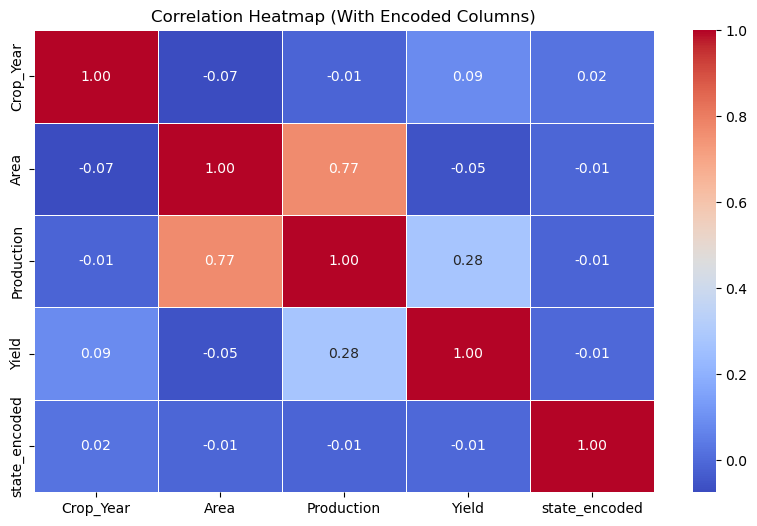

In [44]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Convert categorical columns to numeric (example: 'state' column)
df_check['state_encoded'] = label_encoder.fit_transform(df_check['State'])

# Now plot correlation with the new encoded column
df_encoded = df_check.select_dtypes(include=[np.number])  # Only numeric columns now
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap (With Encoded Columns)')
plt.show()


In [52]:
# List all column names
print(df_check.columns)


Index(['State', 'District', 'Crop', 'Crop_Year', 'Season', 'Area',
       'Production', 'Yield', 'state_encoded'],
      dtype='object')


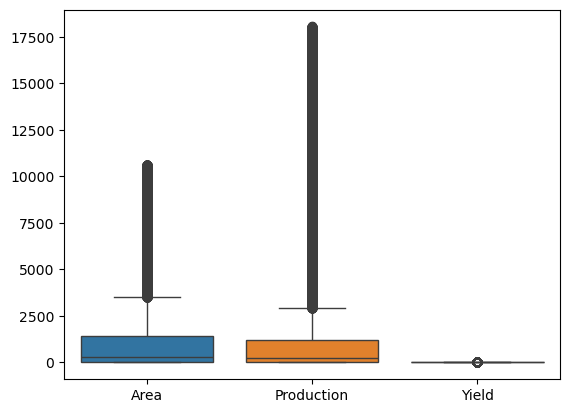

In [58]:
sns.boxplot(df_check[['Area', 'Production', 'Yield']])
plt.show()


C:\Users\ARSH\AppData\Local\Temp\ipykernel_24044\2003662036.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State_encoded', data=df_check, palette='Set2')


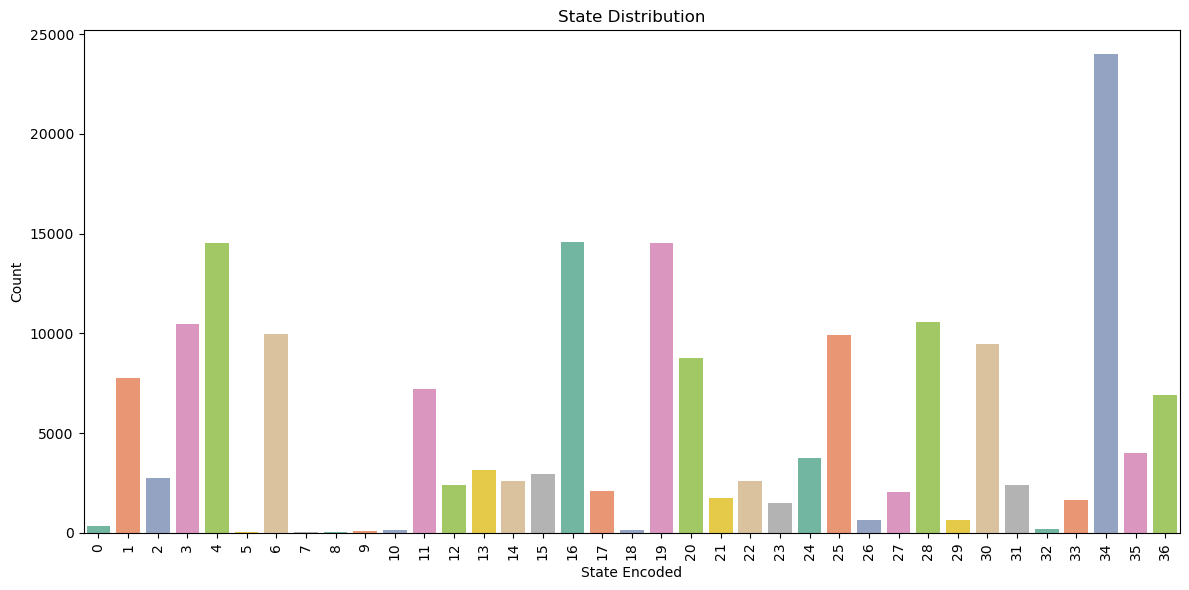

In [66]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'state' column (adjust the column name if necessary)
df_check['State_encoded'] = label_encoder.fit_transform(df_check['State'])

# Now plot the bar plot for the encoded state
plt.figure(figsize=(12, 6))
sns.countplot(x='State_encoded', data=df_check, palette='Set2')

plt.title('State Distribution')
plt.xlabel('State Encoded')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()  # Ensures everything fits without clipping
plt.show()


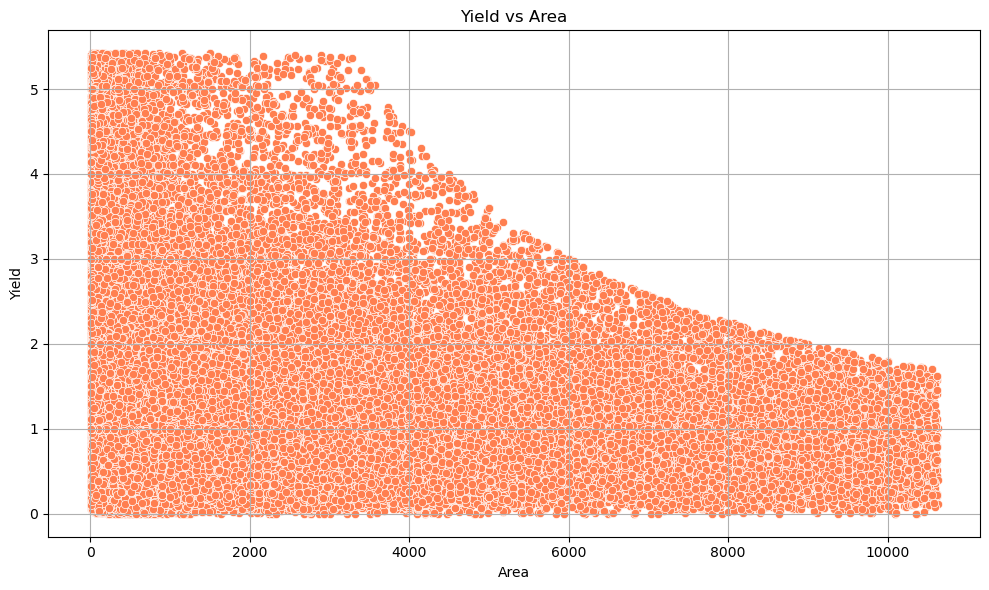

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Yield vs Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Yield', data=df_check, color='coral')

plt.title('Yield vs Area')
plt.xlabel('Area')
plt.ylabel('Yield')
plt.grid(True)
plt.tight_layout()  # Ensures everything fits without clipping
plt.show()



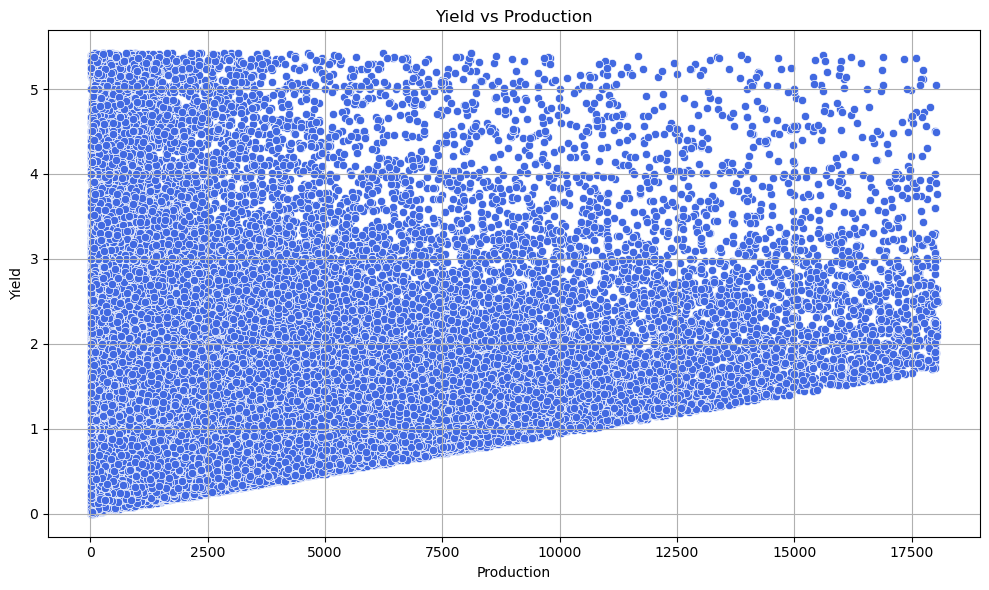

In [72]:
# Scatter plot of Yield vs Production
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Production', y='Yield', data=df_check, color='royalblue')

plt.title('Yield vs Production')
plt.xlabel('Production')
plt.ylabel('Yield')
plt.grid(True)
plt.tight_layout()  # Ensures everything fits without clipping
plt.show()


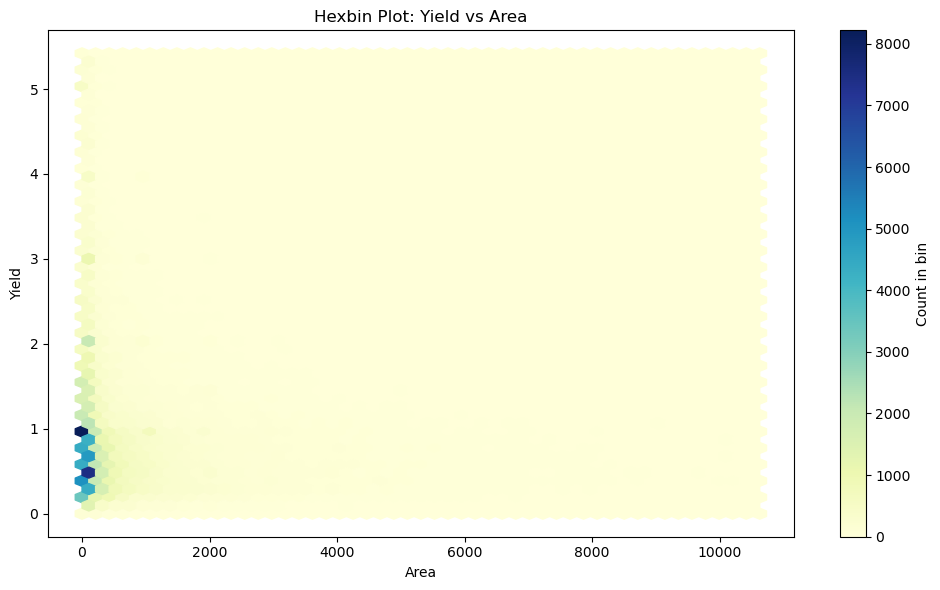

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hexbin plot of Yield vs Area (better for high-volume data)
plt.figure(figsize=(10, 6))
plt.hexbin(df_check['Area'], df_check['Yield'], gridsize=50, cmap='YlGnBu')

# Adding color bar
plt.colorbar(label='Count in bin')

# Adding titles and labels
plt.title('Hexbin Plot: Yield vs Area')
plt.xlabel('Area')
plt.ylabel('Yield')

plt.tight_layout()
plt.show()



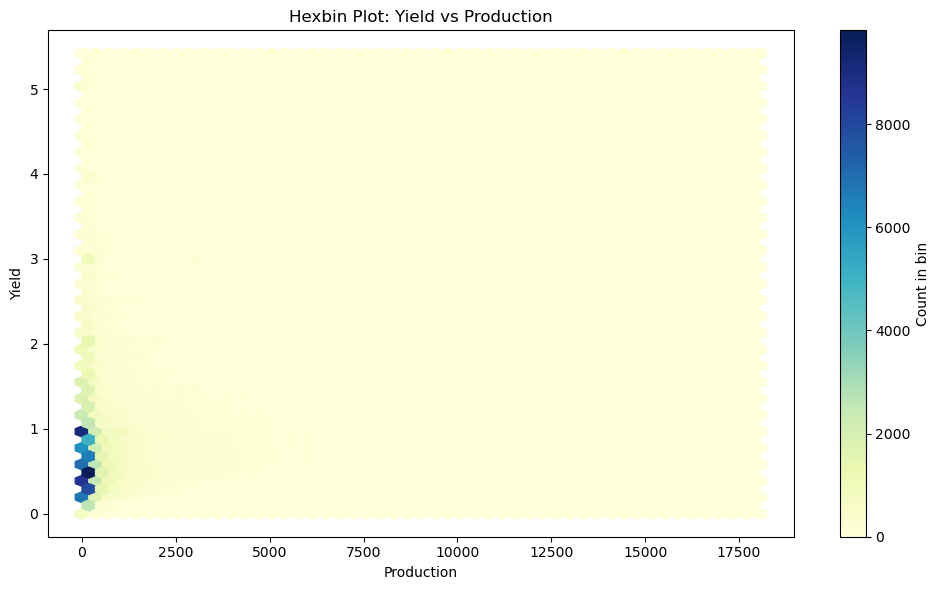

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hexbin plot of Yield vs Production (better for high-volume data)
plt.figure(figsize=(10, 6))
plt.hexbin(df_check['Production'], df_check['Yield'], gridsize=50, cmap='YlGnBu')

# Adding color bar
plt.colorbar(label='Count in bin')

# Adding titles and labels
plt.title('Hexbin Plot: Yield vs Production')
plt.xlabel('Production')
plt.ylabel('Yield')

plt.tight_layout()
plt.show()


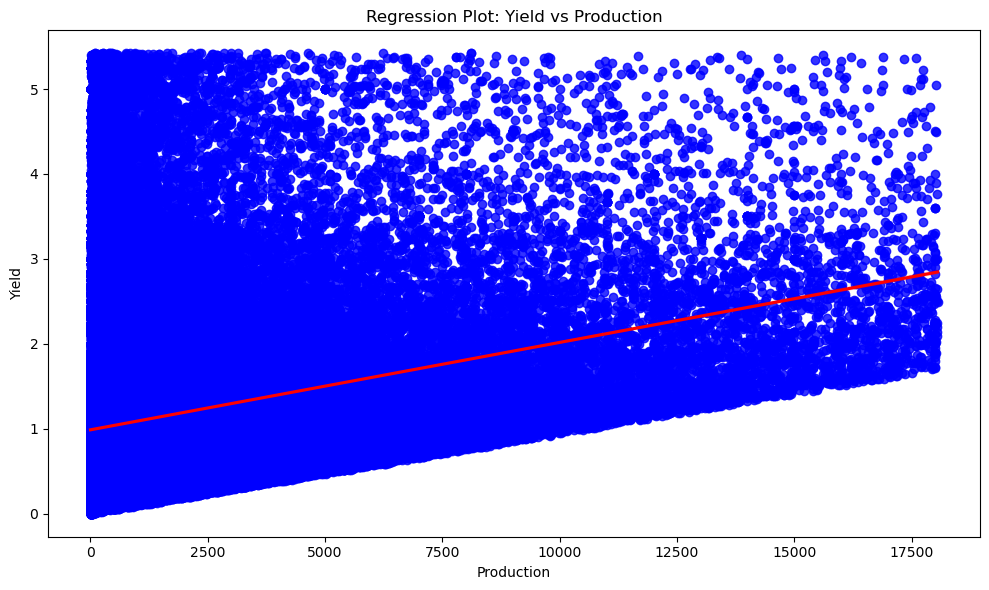

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Regression plot of Yield vs Production
plt.figure(figsize=(10, 6))
sns.regplot(x='Production', y='Yield', data=df_check, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Regression Plot: Yield vs Production')
plt.xlabel('Production')
plt.ylabel('Yield')
plt.tight_layout()
plt.show()


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle

# Set random seed for reproducibility
np.random.seed(42)

# Load the cleaned dataset
try:
    df = pd.read_csv('cleaned_data.csv')
    print("Dataset loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print("Error: 'cleaned_data.csv' not found. Ensure the file is in the correct directory.")
    raise

# Step 1: Verify Yield vs. Calculated_Yield
df['Calculated_Yield'] = (df['Production'] / df['Area']).round(2)
yield_diff = df[df['Yield'] != df['Calculated_Yield']]
print(f"\nRows where Yield differs from Calculated_Yield: {len(yield_diff)}")
if len(yield_diff) > 0:
    print(yield_diff[['Yield', 'Calculated_Yield']].head())

# Use Calculated_Yield as target (more reliable, assuming minor differences are rounding errors)
df['Target_Yield'] = df['Calculated_Yield']
df = df.drop(['Yield', 'Calculated_Yield'], axis=1)

# Step 2: Check for missing values (should be none after notebook preprocessing)
print("\nMissing values:")
print(df.isnull().sum())

# Step 3: Analyze data distribution
# Plot distribution of Target_Yield
plt.figure(figsize=(10, 6))
sns.histplot(df['Target_Yield'], bins=50, kde=True)
plt.title('Distribution of Target_Yield')
plt.xlabel('Target_Yield')
plt.ylabel('Frequency')
plt.savefig('target_yield_distribution.png')
plt.close()

# Check skewness
skewness = df['Target_Yield'].skew()
print(f"Skewness of Target_Yield: {skewness}")

# Apply log transformation if skewed
if abs(skewness) > 1:
    df['Log_Target_Yield'] = np.log1p(df['Target_Yield'])
    print("Applied log transformation to Target_Yield")
else:
    df['Log_Target_Yield'] = df['Target_Yield']  # No transformation needed

# Analyze categorical feature distributions
categorical_cols = ['State', 'District', 'Crop', 'Season']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts().head(10))

# Step 4: Enhance feature engineering
# Target encoding for high-cardinality features
def target_encode(df, column, target):
    target_mean = df.groupby(column)[target].mean()
    df[f'{column}_target_encoded'] = df[column].map(target_mean)
    return df, target_mean

# Apply target encoding
df, state_mean = target_encode(df, 'State', 'Target_Yield')
df, district_mean = target_encode(df, 'District', 'Target_Yield')
df, crop_mean = target_encode(df, 'Crop', 'Target_Yield')
df, season_mean = target_encode(df, 'Season', 'Target_Yield')

# Create interaction feature: Crop_Season
df['Crop_Season'] = df['Crop'] + '_' + df['Season']
le = LabelEncoder()
df['Crop_Season_encoded'] = le.fit_transform(df['Crop_Season'])

# Save label encoder for Crop_Season
with open('crop_season_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

# Save target encoding mappings for test data
with open('target_encodings.pkl', 'wb') as f:
    pickle.dump({
        'state_mean': state_mean,
        'district_mean': district_mean,
        'crop_mean': crop_mean,
        'season_mean': season_mean
    }, f)

# Step 5: Prepare final dataset
# Drop original categorical columns and redundant features
model_df = df.drop(['State', 'District', 'Crop', 'Season', 'Crop_Season'], axis=1)

# Ensure no missing values in final dataset
print("\nMissing values in final dataset:")
print(model_df.isnull().sum())

# Step 6: Save processed dataset
model_df.to_csv('processed_data_for_training.csv', index=False)
print("\nProcessed dataset saved as 'processed_data_for_training.csv'")

# Step 7: Summary
print("\nFinal features for modeling:")
print(model_df.columns)
print(f"Dataset shape: {model_df.shape}")

Dataset loaded successfully!
               State District               Crop  Crop_Year      Season  \
0          Jharkhand  RAMGARH             Potato       2013      Winter   
1  Jammu and Kashmir    REASI  Moong(Green Gram)       2015      Kharif   
2            Haryana  GURGAON       Sweet potato       2009  Whole Year   
3      Uttar Pradesh   JALAUN           Sannhamp       2010      Kharif   
4         Tamil Nadu  MADURAI          Sugarcane       2006  Whole Year   

     Area  Production   Yield  
0  1361.0      7544.0    5.54  
1    13.0         9.0    0.70  
2    39.0       800.0   20.51  
3     9.0         3.0    0.33  
4  6006.0    656204.0  109.26  

Rows where Yield differs from Calculated_Yield: 5920
    Yield  Calculated_Yield
1    0.70              0.69
10  10.50             11.00
21   7.56              7.59
49   0.39              0.42
55   0.69              0.71

Missing values:
State           0
District        0
Crop            0
Crop_Year       0
Season          0

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('processed_data_for_training.csv')
X = df.drop(['Target_Yield', 'Log_Target_Yield'], axis=1)
y = df['Log_Target_Yield'] if 'Log_Target_Yield' in df.columns and abs(df['Target_Yield'].skew()) > 1 else df['Target_Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['Crop_Year'])
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

RMSE: 0.0713
R²: 0.9962


In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle

# Set random seed for reproducibility
np.random.seed(42)

# Load the processed dataset
try:
    df = pd.read_csv('processed_data_for_training.csv')
    print("Dataset loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print("Error: 'processed_data_for_training.csv' not found. Ensure the file is in the correct directory.")
    raise

# Prepare features and target
X = df.drop(['Target_Yield', 'Log_Target_Yield'], axis=1)
y = df['Log_Target_Yield'] if abs(df['Target_Yield'].skew()) > 1 else df['Target_Yield']
print("\nUsing target:", 'Log_Target_Yield' if abs(df['Target_Yield'].skew()) > 1 else 'Target_Yield')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['Crop_Year']
)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nRegression Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_regressor.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Save the model
with open('rf_regressor_model.pkl', 'wb') as f:
    pickle.dump(rf_regressor, f)
print("\nModel saved as 'rf_regressor_model.pkl'")

# Save predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.to_csv('regression_predictions.csv', index=False)
print("Predictions saved as 'regression_predictions.csv'")

Dataset loaded successfully!
   Crop_Year    Area  Production  Target_Yield  Log_Target_Yield  \
0       2013  1361.0      7544.0          5.54          1.877937   
1       2015    13.0         9.0          0.69          0.524729   
2       2009    39.0       800.0         20.51          3.068518   
3       2010     9.0         3.0          0.33          0.285179   
4       2006  6006.0    656204.0        109.26          4.702841   

   State_target_encoded  District_target_encoded  Crop_target_encoded  \
0              2.728260                 2.226116            13.093273   
1              1.800636                 1.056364             0.494953   
2              6.857021                 4.504159             9.292388   
3              5.636944                 4.453000             1.467122   
4            296.833538               341.738175            55.614211   

   Season_target_encoded  Crop_Season_encoded  
0               6.268748                  150  
1               2.368389   